# Assignment 2 - Data Modelling and Presentation

## Glass Identification using Classification techniques

Research Goal:

To develop a machine learning model to accurately classify the type of glass based on its chemical composition and refractive index.

## Task 1: Retrieving and Preparing the Data

Data retrieving and Data Preparation are part of Data Curation process. Data retrieving involves collecting the dataset from various sources and ensuring the dataset is in right format for further processing. Data Preparation focuses on cleanig and transforming the data suitable for analysis.

In [1]:
#Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data Retrieving

* The Glass Identification dataset is taken from UCI Machine Learning Repository
* The given data is structured and stored in text formt with each values seperated by comma.
* For facilitating easier data manipulation and integration with various data analysis tools, the text format dataset is manually converted to csv format using MS spreadsheet. 

In [2]:
#Loading the dataset
glass_dataset_path = 'Glass Identification\glass.csv'
glass_dataset = pd.read_csv(glass_dataset_path, sep=",", decimal=".", header=None,
                            names=["Id_number", "RefractiveIndex", "Sodium(Na)", "Magnesium(Mg)", "Aluminium(Al)", "Silicon(Si)",
                                   "Potassium(K)", "Calcium(Ca)", "Barium(Ba)", "Iron(Fe)", "Type_of_glass"] )
glass_dataset

,Id_number,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Inspecting the dataset

In [3]:
#determining the shape of the dataset
glass_dataset.shape

(214, 11)

In [4]:
#Displaying the column names
glass_dataset.columns

Index(['Id_number', 'RefractiveIndex', 'Sodium(Na)', 'Magnesium(Mg)',
       'Aluminium(Al)', 'Silicon(Si)', 'Potassium(K)', 'Calcium(Ca)',
       'Barium(Ba)', 'Iron(Fe)', 'Type_of_glass'],
      dtype='object')

In [5]:
#Displaying the datatype of each column
glass_dataset.dtypes

Id_number            int64
RefractiveIndex    float64
Sodium(Na)         float64
Magnesium(Mg)      float64
Aluminium(Al)      float64
Silicon(Si)        float64
Potassium(K)       float64
Calcium(Ca)        float64
Barium(Ba)         float64
Iron(Fe)           float64
Type_of_glass        int64
dtype: object

In [6]:
glass_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_number        214 non-null    int64  
 1   RefractiveIndex  214 non-null    float64
 2   Sodium(Na)       214 non-null    float64
 3   Magnesium(Mg)    214 non-null    float64
 4   Aluminium(Al)    214 non-null    float64
 5   Silicon(Si)      214 non-null    float64
 6   Potassium(K)     214 non-null    float64
 7   Calcium(Ca)      214 non-null    float64
 8   Barium(Ba)       214 non-null    float64
 9   Iron(Fe)         214 non-null    float64
 10  Type_of_glass    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


**Insights:**
* The dataset consists of 214 instances and 10 numerical attributes (including Id_number, which is a incremental value) and a class attribute "Type_of_glass"(target variable) which indicates the type of glass(number from 1-7 representing 7 types of glass).
* Columns from Index 1 to 9 are stored in float datatype and last index, target variable is stored in int datatype
* Index 1 (RefractiveIndex) - In optics, the refractive index (or refraction index) of an optical medium is a dimensionless number that gives the indication of the light bending ability of that medium. The refractive index determines how much the path of light is bent, or refracted, when entering a material. It is denoted by n.
* Refractive Index of plain glass is n = 1.5.
* Index 2-9 (Sodium - Iron) represents weight percent in corresponding oxide.
* Type_of_glass column consits of below glass types with their corresponing number representation
         1 building_windows_float_processed
         2 building_windows_non_float_processed
         3 vehicle_windows_float_processed
         4 vehicle_windows_non_float_processed (none in this database)
         5 containers
         6 tableware
         7 headlamps

### Data Preparing 

Data Preparation focuses on removing errors in data so that data becomes a true and consistent representation of the processes it originates from.
The errors could be mistakes during data entry, missing values, impossible values, redundant white spaces, outliers

In [7]:
# Dropping the Id_number column since it's just an identifier
glass_dataset = glass_dataset.drop("Id_number", axis=1)
glass_dataset.head(10)

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [8]:
#Checking for data entry errors
glass_dataset['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

For simple variables, finding the frequency count can detect the data entry error. Type of glass attribute doesn't have any data entry error as the values lies as per dataset description

In [9]:
#Checking for redundant white spaces
white_space_mask = glass_dataset.applymap(lambda x: isinstance(x, str) and x.strip() != x)

# Print columns with white spaces
columns_with_white_space = glass_dataset.columns[white_space_mask.any()]
print("Columns with white spaces:", columns_with_white_space)

Columns with white spaces: Index([], dtype='object')


In [10]:
#Checking for missing values
glass_dataset.isna().sum()

RefractiveIndex    0
Sodium(Na)         0
Magnesium(Mg)      0
Aluminium(Al)      0
Silicon(Si)        0
Potassium(K)       0
Calcium(Ca)        0
Barium(Ba)         0
Iron(Fe)           0
Type_of_glass      0
dtype: int64

In [11]:
#Checking for dulicate rows
glass_dataset[glass_dataset.duplicated()]

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
#Dropping the duplicated row
glass_dataset = glass_dataset.drop_duplicates()
glass_dataset.shape

(213, 10)

In [13]:
#Displaying statistical information of quantitative columns
glass_dataset.describe()

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
glass_dataset['RefractiveIndex'].describe()

count    213.000000
mean       1.518348
std        0.003033
min        1.511150
25%        1.516520
50%        1.517680
75%        1.519150
max        1.533930
Name: RefractiveIndex, dtype: float64

* According to official sources [4], the refractive index of glass ranges from 1.50-1.54.
* From the above statistical information, the minimum and maximum value of Refractive Index is 1.511150 and 1.533930 Hence this is in correct range and doesn't have any data entry errors.

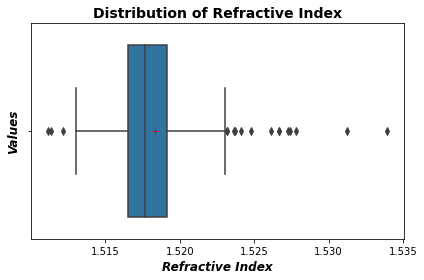

In [15]:
#Checking for outliers in RefractiveIndex column

sns.boxplot(x=glass_dataset['RefractiveIndex'],showmeans=True,meanprops={'marker':'+','markeredgecolor':'red'})
plt.title('Distribution of Refractive Index', fontsize=14, fontweight='bold')
plt.xlabel('Refractive Index', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel('Values', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.tight_layout() 
plt.show()

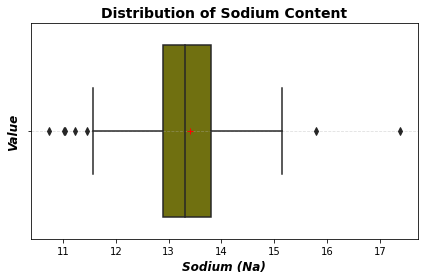

In [16]:
#Checking for outliers in Sodium(Na) column
sns.boxplot(x=glass_dataset['Sodium(Na)'], showmeans=True, color='olive',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Sodium Content", fontsize=14, fontweight='bold')
plt.xlabel("Sodium (Na)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

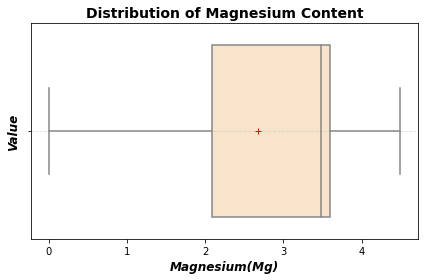

In [17]:
#Checking for outliers in Magnesium(Mg) column
sns.boxplot(x=glass_dataset['Magnesium(Mg)'], showmeans=True, color='bisque',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Magnesium Content", fontsize=14, fontweight='bold')
plt.xlabel("Magnesium(Mg)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

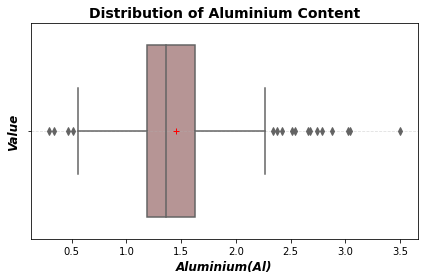

In [18]:
#Checking for outliers in Aluminium(Al) column
sns.boxplot(x=glass_dataset['Aluminium(Al)'], showmeans=True, color='rosybrown',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Aluminium Content", fontsize=14, fontweight='bold')
plt.xlabel("Aluminium(Al)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

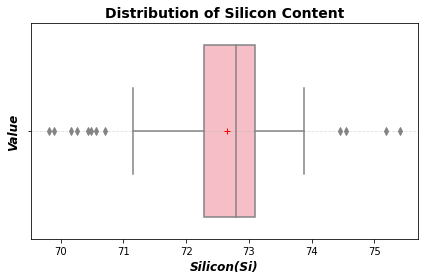

In [19]:
#Checking for outliers in Silicon(Si) column
sns.boxplot(x=glass_dataset['Silicon(Si)'], showmeans=True, color='lightpink',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Silicon Content", fontsize=14, fontweight='bold')
plt.xlabel("Silicon(Si)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

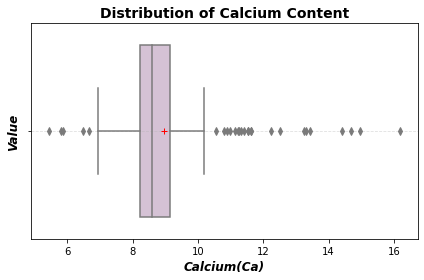

In [20]:
#Checking for outliers in Calcium(Ca) column
sns.boxplot(x=glass_dataset['Calcium(Ca)'], showmeans=True, color='thistle',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Calcium Content", fontsize=14, fontweight='bold')
plt.xlabel("Calcium(Ca)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

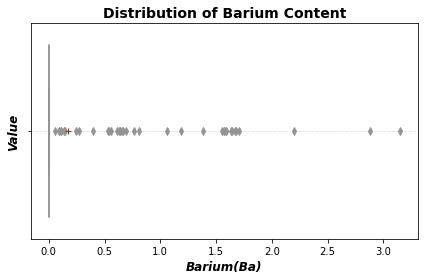

In [21]:
#Checking for outliers in Barium(Ba) column
sns.boxplot(x=glass_dataset['Barium(Ba)'], showmeans=True, color='azure',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Barium Content", fontsize=14, fontweight='bold')
plt.xlabel("Barium(Ba)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

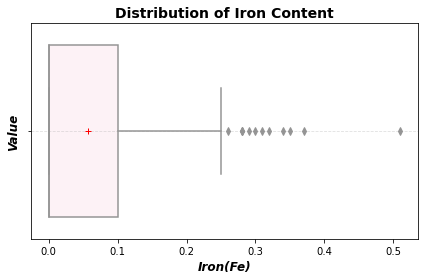

In [22]:
#Checking for outliers in Iron(Fe) column
sns.boxplot(x=glass_dataset['Iron(Fe)'], showmeans=True, color='lavenderblush',meanprops={"marker":'+','markeredgecolor':'red'})
plt.title("Distribution of Iron Content", fontsize=14, fontweight='bold')
plt.xlabel("Iron(Fe)",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel("Value",fontsize=12, fontweight='semibold', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.tight_layout()  

plt.show()

**Insights**
* '+' Indicates the mean value of each distribution.
* The horizontal line in the middle of each box represents the median of the particular element content. 
* The box itself contains the middle 50% of the data (interquartile range). 
* The whiskers extend to the lowest and highest data points that are not considered outliers.
* Most of the columns don't have many outliers.
* Element Barium has all of its values falling around 0, which shows that this element weight percent in correspoding oxide is very less.
* Since this dataset represents the chemical composition of different glass types, with each element contributing to the glass manufacturing process, and it consists of only 9 features for predicting the final value, these minor outliers are not addressed.
* Added to that, the composition of these 9 features varies according to the type of glass and the manufacturer/guidelines. So collaborating with Subject Matter Experteise(SME) and Business owners is essential to arrive at an conclusion.

In [23]:
#Changing the datatype of Target variable to object
glass_dataset['Type_of_glass'] = glass_dataset['Type_of_glass'].astype('str')
glass_dataset['Type_of_glass'].dtypes

dtype('O')

The target variable "Type_of_glass" is stored in int datatype and each number represents one glass type. While finding correlations and during modelling stage this attribute should be treated as categorical variable instead of a continuous variable. So to avoid any misleading, this attribute is converted to object datatype

# Task 2: Data Exploration

Data Exploration is also the part of Data Curation process. It focusses on what we can learn from the data.
This can be done by using graphical techniques to gain understanding about each features and the interaction between features

In [24]:
#Displaying statistical information of quantitative columns
glass_dataset.describe()

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe)
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### 2.1: Exploring Columns 

In [25]:
#Features of this dataset
features=glass_dataset.columns[:-1]
columns=list(features)
columns

['RefractiveIndex',
 'Sodium(Na)',
 'Magnesium(Mg)',
 'Aluminium(Al)',
 'Silicon(Si)',
 'Potassium(K)',
 'Calcium(Ca)',
 'Barium(Ba)',
 'Iron(Fe)']

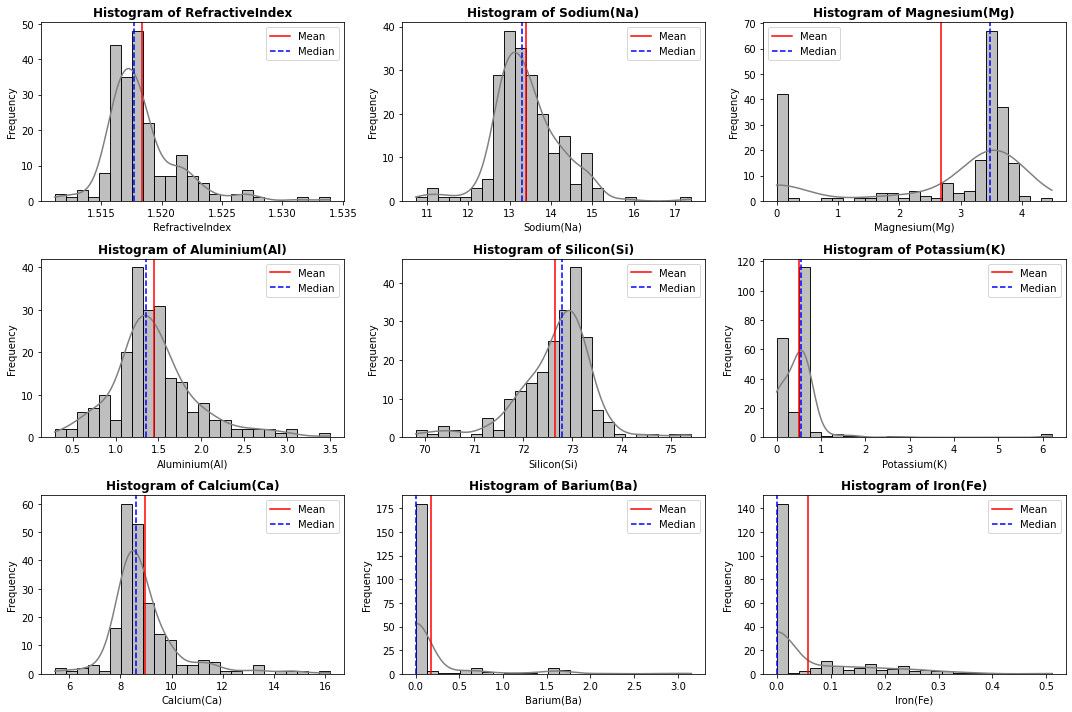

In [26]:
#Histogram for each features in the dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(glass_dataset[column], bins=25, kde=True, color='gray')
    plt.axvline(x=glass_dataset[column].mean(), color='red', linestyle='-', label='Mean')
    plt.axvline(x=glass_dataset[column].median(), color='blue', linestyle='--', label='Median')
    plt.title(f'Histogram of {column}', fontweight='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [27]:
#Finding skewness for each columns
for col in columns:
    skewness=glass_dataset[col].skew()
    print('Skewness for ',col,'= ',skewness)

Skewness for  RefractiveIndex =  1.6480173737729908
Skewness for  Sodium(Na) =  0.46569850922621137
Skewness for  Magnesium(Mg) =  -1.1460958436967303
Skewness for  Aluminium(Al) =  0.9384017147473468
Skewness for  Silicon(Si) =  -0.7446460155618705
Skewness for  Potassium(K) =  6.545428649493799
Skewness for  Calcium(Ca) =  2.050752066632569
Skewness for  Barium(Ba) =  3.406748836984873
Skewness for  Iron(Fe) =  1.747173207250088


**Insights**
* Skewness is a measure of asymmetry or distortion of symmetric distribution. It measures the deviation of the given distribution of a random variable from a symmetric distribution, such as normal distribution. 
* It can be inferred from the above results that, none of the columns are equally distributed
* Values of column(element) Aluminium and Calcium are slightly equally distributed
* The values of element Silicon lies in higher concentration compared to other elements followed by Sodium and Calcium.


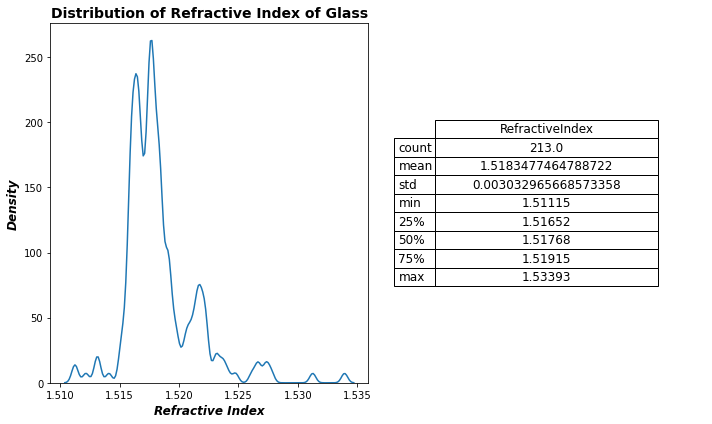

In [28]:
#Exploring Refractive Index column

# descriptive statistics
desc_stats = glass_dataset['RefractiveIndex'].describe()

#figure using subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Density plot
sns.kdeplot(glass_dataset['RefractiveIndex'], ax=axes[0], bw_adjust=0.25)
axes[0].set_xlabel('Refractive Index', fontsize=12, fontweight='semibold', fontstyle='italic')
axes[0].set_ylabel('Density', fontsize=12, fontweight='semibold', fontstyle='italic')
axes[0].set_title('Distribution of Refractive Index of Glass', fontsize=14, fontweight='bold')

# Table for descriptive statistics
axes[1].axis('off')
table = pd.plotting.table(axes[1], desc_stats, loc='center', cellLoc='center', colWidths=[0.5])

# Adjusting the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.4)

plt.tight_layout()
plt.show()


**Insights**
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset. It helps to visualise the probality density of data by smoothening the observations with a Gaussian kernel, producing a continuous density estimate.
* The graph shows multiple peaks indicating refractive index values are not uniformly distributed. 
* Noticably peaks around 1.515 and 1.520 indicates these value are more common in the dataset.
* The distribution is likely symmetrical, centered around a refractive index of 1.518. This is because the KDEplot graph is centered at around 1.518 and the mean (1.5183) is close to the median (1.517).
* The spread of the refractive index is small. This is because the KDEplot graph shows a narrow peak and the standard deviation (0.003) is small.


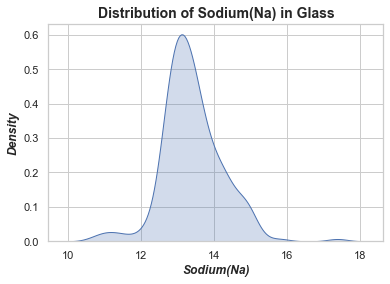

In [29]:
#Exploring Sodium column
#one-dimensional heatmap (KDE plot) of Sodium(Na) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="whitegrid")
sns.kdeplot(data=glass_dataset['Sodium(Na)'], shade=True)
plt.xlabel('Sodium(Na)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Sodium(Na) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [30]:
#descriptive statistics of Sodium
glass_dataset['Sodium(Na)'].describe()

count    213.000000
mean      13.404085
std        0.816662
min       10.730000
25%       12.900000
50%       13.300000
75%       13.810000
max       17.380000
Name: Sodium(Na), dtype: float64

**Insights**
* A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate 


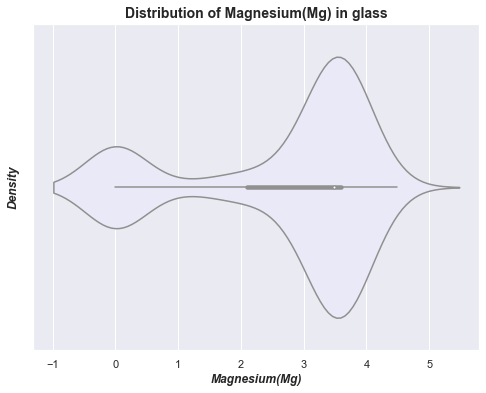

In [31]:
#Exploring Magnesium column
# violin plot for Magnesium(Mg) column
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.violinplot(x=glass_dataset['Magnesium(Mg)'], color='lavender')
plt.title('Distribution of Magnesium(Mg) in glass', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Magnesium(Mg)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.show()

In [32]:
#descriptive statistics of Magnesium(Mg)
glass_dataset['Magnesium(Mg)'].describe()

count    213.000000
mean       2.679202
std        1.443691
min        0.000000
25%        2.090000
50%        3.480000
75%        3.600000
max        4.490000
Name: Magnesium(Mg), dtype: float64

The above provides insights into the distribution of magnesium content in the glass dataset, including measures of central tendency and variability, as well as any potential outliers or patterns.

<Figure size 288x288 with 0 Axes>

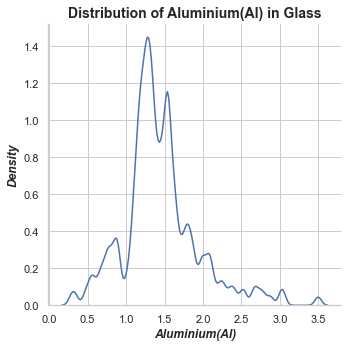

In [33]:
#Exploring Aluminium column
#Density plot of Aluminium(Al)
plt.figure(figsize=(4, 4))
sns.set_theme(style="whitegrid")
sns.displot(glass_dataset, x='Aluminium(Al)', kind ='kde', bw_adjust=.25)
plt.xlabel('Aluminium(Al)', fontdict={'fontsize': 12, 'fontweight': 'black', 'fontstyle': 'italic'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight': 'black', 'fontstyle': 'italic'})
plt.title('Distribution of Aluminium(Al) in Glass', fontdict={'fontsize': 14, 'fontweight': 'semibold'})
plt.tight_layout()
plt.show()

In [34]:
#descriptive statistics of Aluminium(Al)
glass_dataset['Aluminium(Al)'].describe()

count    213.000000
mean       1.449484
std        0.495925
min        0.290000
25%        1.190000
50%        1.360000
75%        1.630000
max        3.500000
Name: Aluminium(Al), dtype: float64

* This one-dimensional heatmap provides a visual representation of the distribution of sodium content in the glass dataset, inorder to explore its density and potential patterns.
* A kernel density estimate (KDE) plot is used here which is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

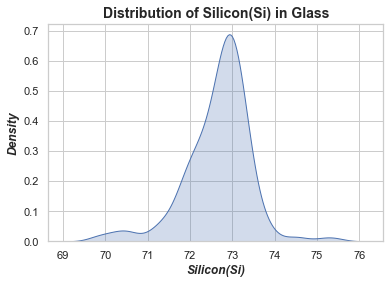

In [35]:
#one-dimensional heatmap (KDE plot) of Silicon(Si) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="whitegrid")
sns.kdeplot(data=glass_dataset['Silicon(Si)'], shade=True)
plt.xlabel('Silicon(Si)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Silicon(Si) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [36]:
#descriptive statistics of Silicon(Si)
glass_dataset['Silicon(Si)'].describe()

count    213.000000
mean      72.655070
std        0.773998
min       69.810000
25%       72.280000
50%       72.790000
75%       73.090000
max       75.410000
Name: Silicon(Si), dtype: float64

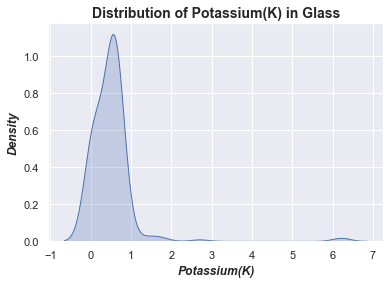

In [37]:
#one-dimensional heatmap (KDE plot) of Potassium(K) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=glass_dataset['Potassium(K)'], shade=True)
plt.xlabel('Potassium(K)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Potassium(K) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [38]:
#descriptive statistics of Potassium(K)
glass_dataset['Potassium(K)'].describe()

count    213.000000
mean       0.498873
std        0.653185
min        0.000000
25%        0.130000
50%        0.560000
75%        0.610000
max        6.210000
Name: Potassium(K), dtype: float64

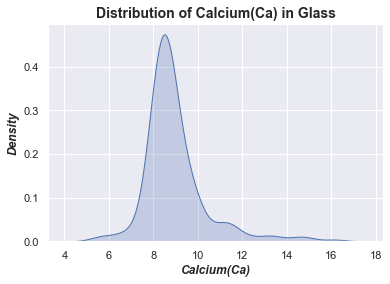

In [39]:
#one-dimensional heatmap (KDE plot) of Calcium(Ca) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=glass_dataset['Calcium(Ca)'], shade=True)
plt.xlabel('Calcium(Ca)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Calcium(Ca) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [40]:
#descriptive statistics of Calcium(Ca)
glass_dataset['Calcium(Ca)'].describe()

count    213.000000
mean       8.954085
std        1.425882
min        5.430000
25%        8.240000
50%        8.600000
75%        9.150000
max       16.190000
Name: Calcium(Ca), dtype: float64

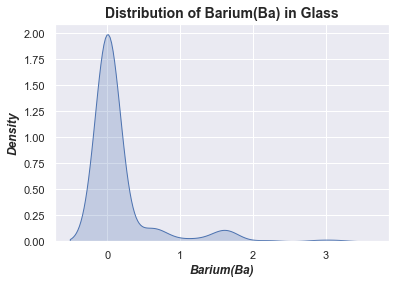

In [41]:
#one-dimensional heatmap (KDE plot) of Barium(Ba) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=glass_dataset['Barium(Ba)'], shade=True)
plt.xlabel('Barium(Ba)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Barium(Ba) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [42]:
#descriptive statistics of Barium(Ba)
glass_dataset['Barium(Ba)'].describe()

count    213.000000
mean       0.175869
std        0.498245
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.150000
Name: Barium(Ba), dtype: float64

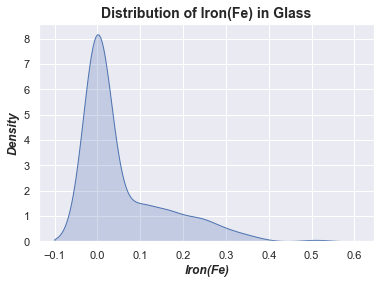

In [43]:
#one-dimensional heatmap (KDE plot) of Iron(Fe) column
plt.figure(figsize=(6, 4))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=glass_dataset['Iron(Fe)'], shade=True)
plt.xlabel('Iron(Fe)', fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.ylabel('Density',fontdict={'fontsize': 12, 'fontweight': 'semibold', 'fontstyle': 'italic'})
plt.title('Distribution of Iron(Fe) in Glass', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [44]:
#descriptive statistics of Iron(Fe)
glass_dataset['Iron(Fe)'].describe()

count    213.000000
mean       0.057277
std        0.097589
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.510000
Name: Iron(Fe), dtype: float64

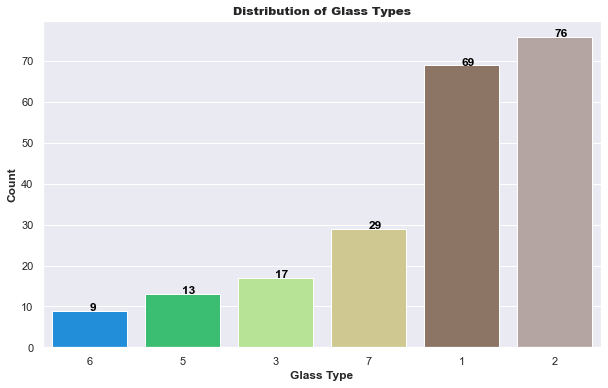

In [45]:
# Distribution of'Type_of_glass' column

count_data = glass_dataset['Type_of_glass'].value_counts()
sorted_data = count_data.sort_values()

# BarPlot for the distribution of Glass types
plt.figure(figsize=(10, 6))
graph = sns.barplot(x=sorted_data.index, y=sorted_data.values, palette='terrain', order=sorted_data.index)

for gtype, gcount in enumerate(sorted_data.values):
    graph.text(gtype, gcount, str(gcount), color='black', fontweight='bold')

plt.title('Distribution of Glass Types', fontweight='black')
plt.xlabel('Glass Type', fontweight='semibold')
plt.ylabel('Count',fontweight='semibold')
plt.show()

**Insights**
* From the above graph, we can infer that the types of glass used in this dataset is not uniformally distributed

### 2.2: Exploring relationship between all pairs of attributes

<AxesSubplot:>

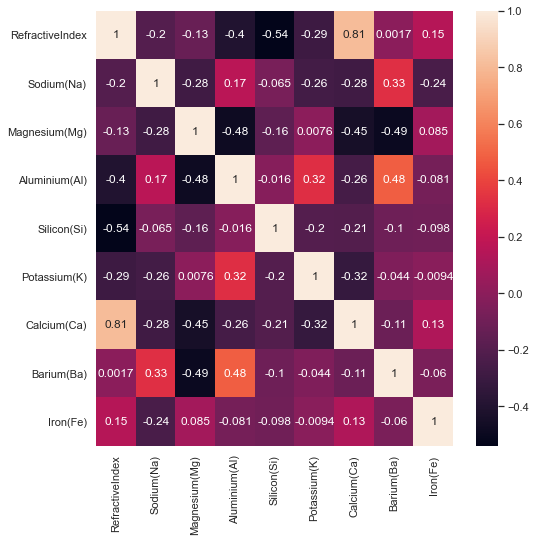

In [46]:
#Pairplot for all the columns except target in the dataset to explore relationship/correlation between columns
plt.figure(figsize=(8,8))
correlation_matrix=glass_dataset.corr()
sns.heatmap(correlation_matrix,annot=True)

**Insights**
* There is a high correlation between Calcium and Refractive Index. 
* There is moderate correlation between (Silicon and Refractive Index),(Barium and Magnesium), (Aluminium and Magnesium) and (Aluminium and Barium).

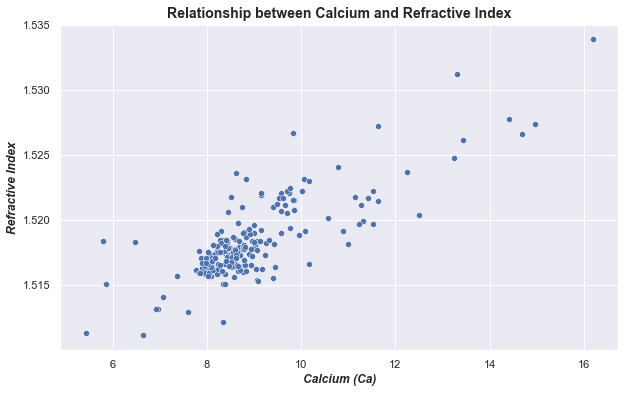

In [47]:
# Exploring the relationship between Calcium and Refractive Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calcium(Ca)', y='RefractiveIndex', data=glass_dataset)
plt.title('Relationship between Calcium and Refractive Index', fontsize=14, fontweight='bold')
plt.xlabel('Calcium (Ca)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel('Refractive Index', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.show()

**Insights**
* The above plot shows each data point plotted according to its calcium content (x-axis) and refractive index (y-axis). 
* There is a weak positive correlation between the two variables. This means that as the calcium content increases, the refractive index also tends to increase, but the data is scattered and there are many exceptions to this trend.

<Figure size 864x720 with 0 Axes>

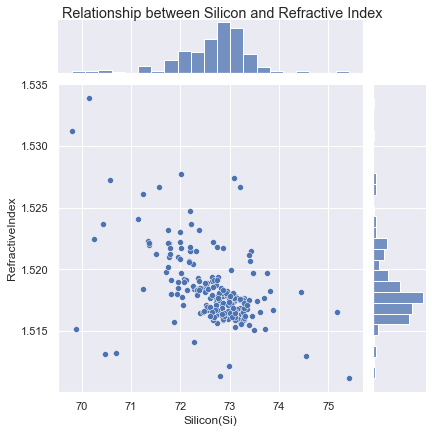

In [48]:
#Exploring the relationship between Silicon and Refractive Index
plt.figure(figsize=(12, 10))
sns.jointplot(x='Silicon(Si)', y='RefractiveIndex', data=glass_dataset, kind='scatter')
plt.suptitle('Relationship between Silicon and Refractive Index', y=1)
plt.show()

**Insights**
* Scatter plot: The above plot shows the relationship between Silicon(Si) in x-axis and RefractiveIndex in y-axis. There doesn’t appear to be a strong correlation between silicon content and refractive index. There seems to be a slight negative correlation between Silicon content and Refractive Index. As the Silicon content increases, the Refractive Index tends to decrease slightly.
* Histogram on the top: This shows the distribution of Silicon content. The x-axis shows Silicon content and the y-axis shows the frequency. The distribution appears to be somewhat symmetrical, with a mode (the most frequent value) around 73.
* Histogram on the right: This shows the distribution of refractive index. The x-axis shows refractive index and the y-axis shows the frequency. The distribution appears to be somewhat symmetrical, with a mode around 1.518.
* Most glass samples have a Silicon content of around 73 and a Refractive Index of around 1.515 to 1.520. This suggests that these values represent typical compositions for the majority of glass samples in the dataset.


Text(0, 0.5, 'Magnesium (Mg)')

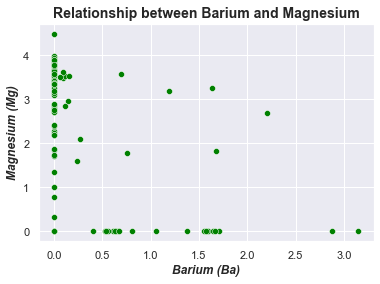

In [49]:
#Exploring the relationship between Barium and Magnesium
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Barium(Ba)', y='Magnesium(Mg)', data=glass_dataset, color='green')
plt.title('Relationship between Barium and Magnesium', fontsize=14, fontweight='bold')
plt.xlabel('Barium (Ba)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel('Magnesium (Mg)', fontsize=12, fontweight='semibold', fontstyle='italic')#plt.show()

**Insights**
* The above plot shows the relationship between Barium(Ba) in x-axis and Magnesium(Mg) in y-axis.
* There is no correlation between these values.
* Most of the values of Barium(Ba) tend to be around zero indicating the concentraction of Barium required for manufacturing most the given type of glass is very minimal.
* There are few cases where Barium content is in the range of 1-3 suggesting this could be outlier or needs to be further investicated.
* Eventhough Magnesium content values varies from 0 to 4, there is a cluster of data points around 3-4 suggesting the Magnesium content is high for most of the samples.

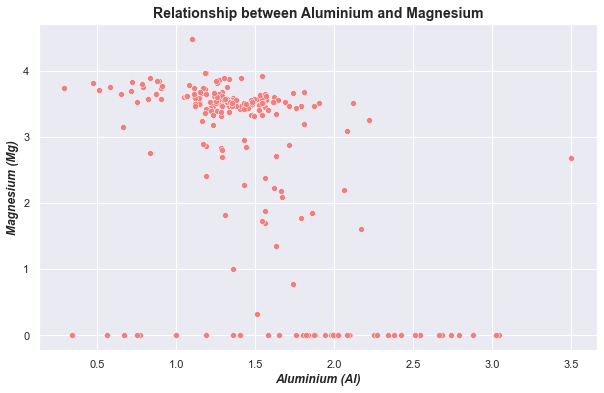

In [50]:
#Exploring the relationship between Aluminium and Magnesium
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aluminium(Al)', y='Magnesium(Mg)', data=glass_dataset, color='lightcoral')
plt.title('Relationship between Aluminium and Magnesium', fontsize=14, fontweight='bold')
plt.xlabel('Aluminium (Al)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel('Magnesium (Mg)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.show()

**Insights**
* The above plot shows the relationship between Aluminium(Al) in x-axis and Magnesium(Mg) in y-axis
* There is no strong linear correlation between Aluminium and Magnesium, as the points do not form a straight line or a clear curve. Instead, there are clusters indicating regions where certain combinations of Al and Mg are more common.

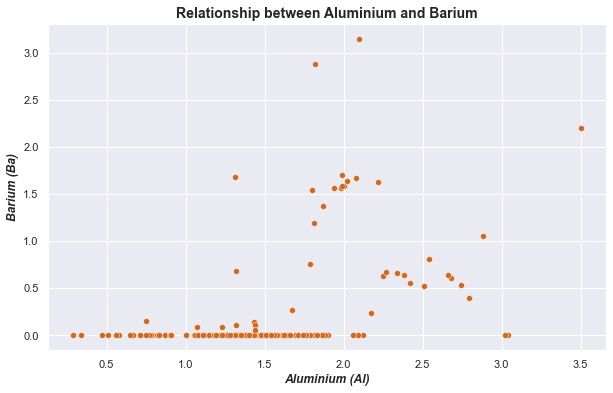

In [51]:
#Exploring the relationship between Aluminium and Barium
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aluminium(Al)', y='Barium(Ba)', data=glass_dataset, color='chocolate')
plt.title('Relationship between Aluminium and Barium', fontsize=14, fontweight='bold')
plt.xlabel('Aluminium (Al)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.ylabel('Barium (Ba)', fontsize=12, fontweight='semibold', fontstyle='italic')
plt.show()


**Insights**
* The above plot shows the relationship between Aluminium(Al) in x-axis and Barium(Ba) in y-axis
* There is no strong correlation between these two elemements. Eventhough the Aluminium(Al) content increases the barium content remained in zero for most the data points.
* There are very few cases where Barium values increases with increase in Aluminum when the Aluminium range is around 2-3 suggesting this could be the trend for few glass type

In [52]:
#Adding a column named Glass for showing the corrspodning glass type
type_mapping = {
    '1': 'building_windows_float_processed',
    '2': 'building_windows_non_float_processed',
    '3': 'vehicle_windows_float_processed',
    '4': 'vehicle_windows_non_float_processed',
    '5': 'containers',
    '6': 'tableware',
    '7': 'headlamps'
}

glass_dataset['Glass_Type'] = glass_dataset['Type_of_glass'].map(type_mapping)
glass_dataset

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass,Glass_Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,headlamps


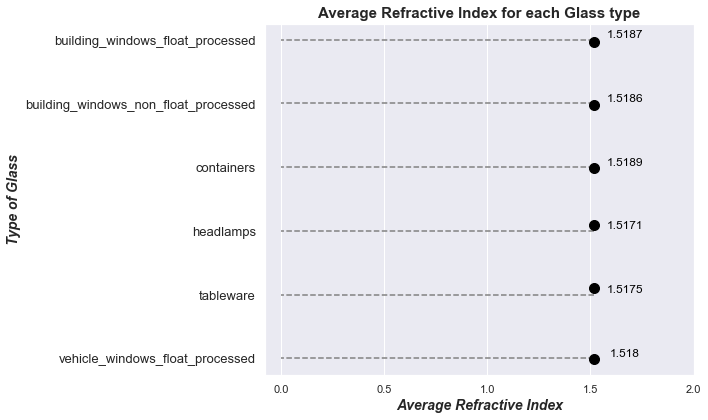

In [53]:
#Relationship between each Glass Type and Refractive Index
avg_refractive_index = glass_dataset.groupby('Glass_Type')['RefractiveIndex'].mean().reset_index()
x_intervals = np.arange(0, avg_refractive_index['RefractiveIndex'].max() + 0.5, 0.5)

plt.figure(figsize=(10, 6))
dotplot = sns.stripplot(x='RefractiveIndex', y='Glass_Type', data=avg_refractive_index, color='black', size=10, linewidth=1)

#annotations and connecting lines
for index, row in avg_refractive_index.iterrows():
    dotplot.text(row.RefractiveIndex+0.15, index, f'{round(row.RefractiveIndex, 4)}', color='black', va='bottom', ha='center')
    plt.plot([row.RefractiveIndex, 0], [index, index], linestyle='--', color='grey')

plt.xticks(x_intervals)
plt.yticks(fontsize=13) 
plt.title('Average Refractive Index for each Glass type',fontsize=15, fontweight='bold')
plt.xlabel('Average Refractive Index',fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Type of Glass',fontsize=14, fontweight='semibold', fontstyle='italic')
plt.tight_layout()
plt.show()

**Insights**
* The above dot plot shows the relationship between Refractive Index and Type of Glass
* All the glass type have similar refractive index which is around 1.51.

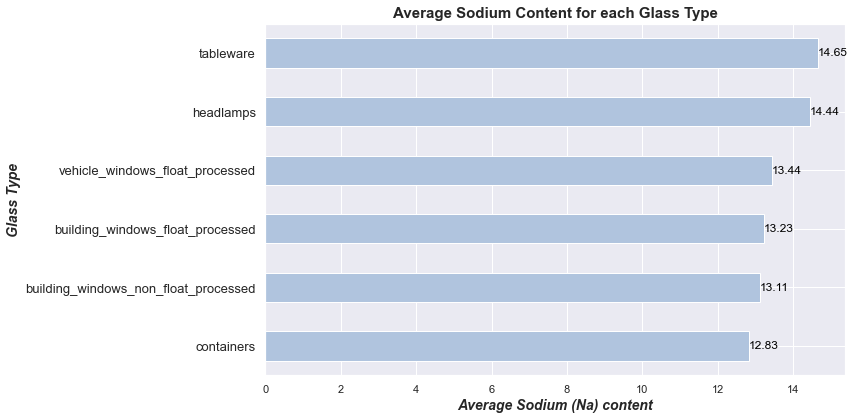

In [54]:
#Relationship between Sodium and Glass type

#average value of sodium for each type
avg_sodium = glass_dataset.groupby(['Glass_Type'])['Sodium(Na)'].mean()

avg_sodium = avg_sodium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
barplot = avg_sodium.plot(kind='barh', color='lightsteelblue') 

# Adding annotations
for index, value in enumerate(avg_sodium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Sodium Content for each Glass Type', fontsize=15, fontweight='bold')
plt.xlabel('Average Sodium (Na) content', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.tight_layout()
plt.show()


**Insights**
* The above graph shows the relationship between Sodium and Glass type.
* The tableware has the highest Sodium content(14.65) followed by headlamps(14.44).
* Containers has the least Sodium content(12.83)

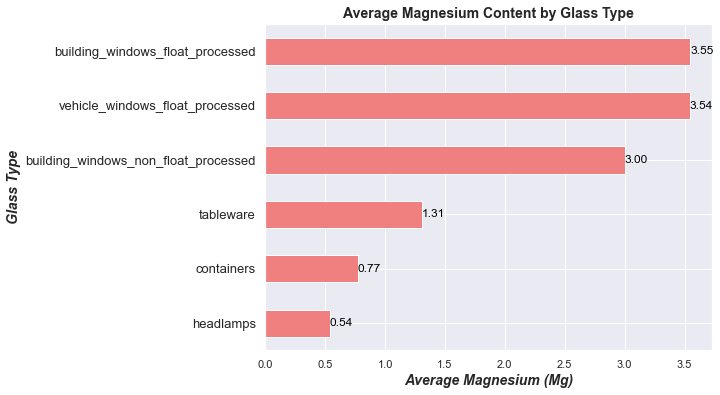

In [55]:
#Relationship between Magnesium and Glass type

# average value of magnesium for each glass type
avg_magnesium = glass_dataset.groupby(['Glass_Type'])['Magnesium(Mg)'].mean()
avg_magnesium = avg_magnesium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
barplot = avg_magnesium.plot(kind='barh', color='lightcoral') 

# Adding annotations
for index, value in enumerate(avg_magnesium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Magnesium Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Magnesium (Mg)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()


**Insights**
* The above graph shows the relationship between Magnesium and Glass type.
* The 'building_windows_float_processed' and 'vehicle_windows_float_processed' have the highest Magnesium content, with the former surpassing the latter by a difference of 0.01, having values of 3.55 and 3.54, respectively.
* headlamps has the least Magnesium content(0.54)

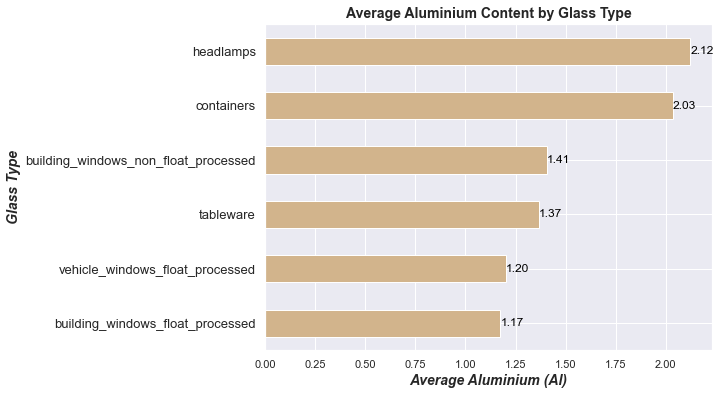

In [56]:
#Relationship between Aluminium and Glass type

# average value of Aluminium for each glass type
avg_aluminium = glass_dataset.groupby(['Glass_Type'])['Aluminium(Al)'].mean()
avg_aluminium = avg_aluminium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
barplot = avg_aluminium.plot(kind='barh', color='tan') 

# Adding annotations
for index, value in enumerate(avg_aluminium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Aluminium Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Aluminium (Al)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Aluminium and Glass type.
* The headlamps has the highest Aluminium content(2.12) followed by headlamps(2.03).
* building_windows_float_processed has the least Aluminium content(1.17)

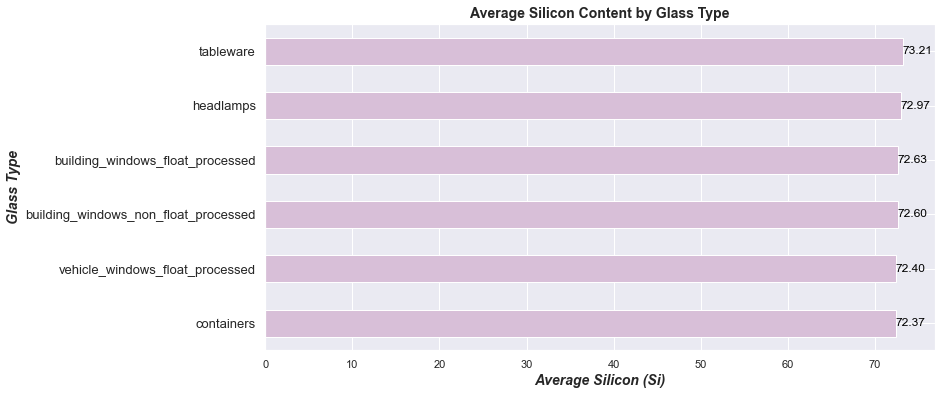

In [57]:
#Relationship between Silicon and Glass type

# average value of Silicon for each glass type
avg_silicon = glass_dataset.groupby(['Glass_Type'])['Silicon(Si)'].mean()
avg_silicon = avg_silicon.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
barplot = avg_silicon.plot(kind='barh', color='thistle') 

# Adding annotations
for index, value in enumerate(avg_silicon):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Silicon Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Silicon (Si)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Silicon and Glass type.
* Almost all the glass type has similar Silicon content which is around 72-73.
* The tableware has the highest Silicon content(73.21) followed by headlamps(72.97).
* containers has the least Silicon content(72.37)

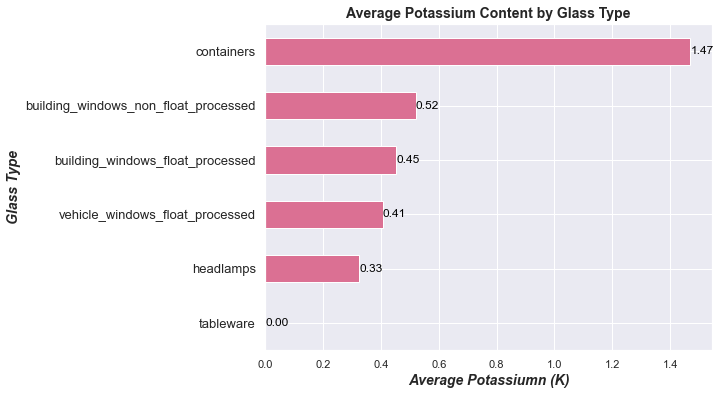

In [58]:
#Relationship between Potassium and Glass type

# average value of Potassium for each glass type
avg_potassium = glass_dataset.groupby(['Glass_Type'])['Potassium(K)'].mean()
avg_potassium = avg_potassium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
barplot = avg_potassium.plot(kind='barh', color='palevioletred') 

# Adding annotations
for index, value in enumerate(avg_potassium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Potassium Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Potassiumn (K)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Potassium and Glass type.
* The containers has the highest Potassium content(1.47) followed by building_windows_non_float_processed(0.52).
* headlamps has the least Potassium content(0.33).
* tableware doesn't have Potassium content.

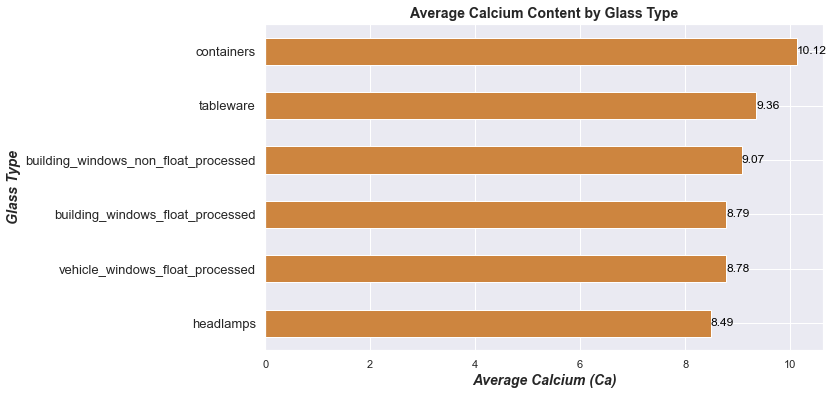

In [59]:
#Relationship between Calcium and Glass type

# average value of Calcium for each glass type
avg_calcium = glass_dataset.groupby(['Glass_Type'])['Calcium(Ca)'].mean()
avg_calcium = avg_calcium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
barplot = avg_calcium.plot(kind='barh', color='peru') 

# Adding annotations
for index, value in enumerate(avg_calcium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Calcium Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Calcium (Ca)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Calcium and Glass type.
* The containers has the highest Calcium content(10.12) followed by tableware(9.36).
* headlamps has the least Calcium content(8.49)

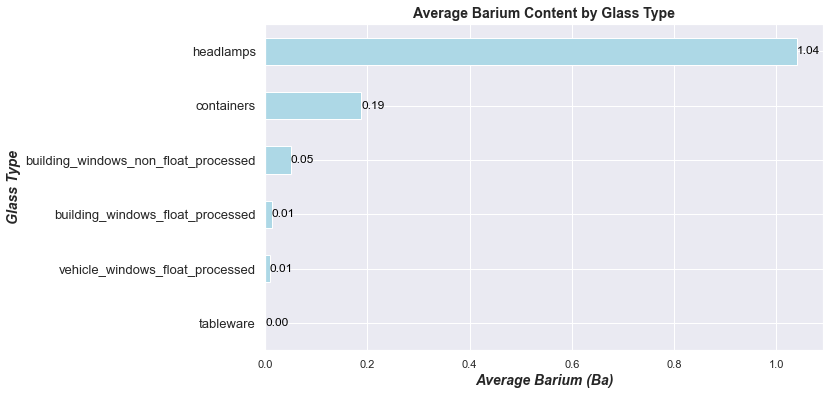

In [60]:
#Relationship between Barium and Glass type

# average value of Calcium for each glass type
avg_barium = glass_dataset.groupby(['Glass_Type'])['Barium(Ba)'].mean()
avg_barium = avg_barium.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
barplot = avg_barium.plot(kind='barh', color='lightblue') 

# Adding annotations
for index, value in enumerate(avg_barium):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Barium Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Barium (Ba)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Barium and Glass type.
* The headlamps has the highest Barium content(1.04) followed by containers(0.19).
* vechicle_windows_float_processed has the least Barium content(0.33).
* tableware doesn't have Barium content.

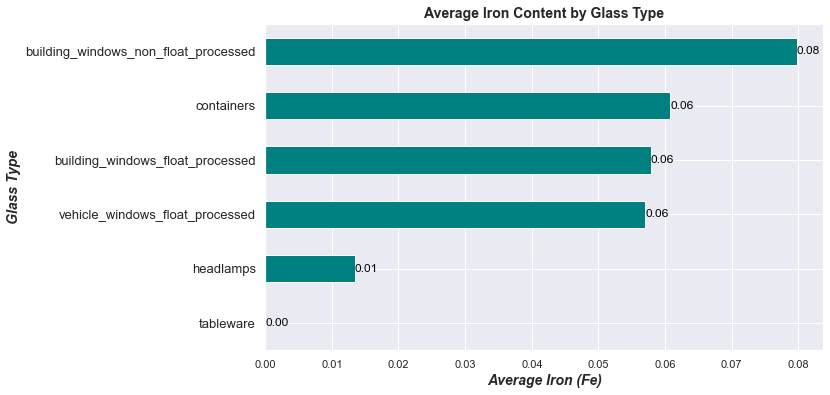

In [61]:
#Relationship between Iron and Glass type

# average value of Calcium for each glass type
avg_iron = glass_dataset.groupby(['Glass_Type'])['Iron(Fe)'].mean()
avg_iron = avg_iron.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
barplot = avg_iron.plot(kind='barh', color='teal') 

# Adding annotations
for index, value in enumerate(avg_iron):
    barplot.text(value, index, f'{value:.2f}', color='black', va='center') 

plt.title('Average Iron Content by Glass Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Iron (Fe)', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.ylabel('Glass Type', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.yticks(fontsize=13) 
plt.show()

**Insights**
* The above graph shows the relationship between Iron and Glass type.
* All the glass type has very minimal amount of Iron around 0.
* building_windows_non_float_processed has the highest Iron content(0.08) followed by containers(0.06).
* headlamps has the least Iron content(0.01).
* tableware doesn't have Iron content.

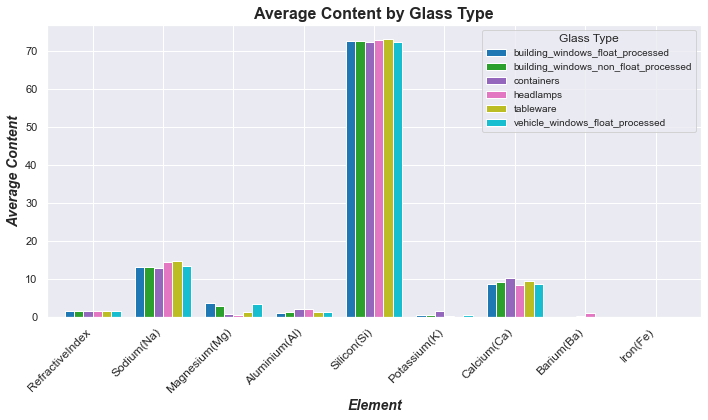

In [62]:
#Exploring the average content of all the elements in each glass type

# average content for each column in each glass type
avg_content = glass_dataset.groupby('Glass_Type').mean()
avg_content = avg_content.T

# Creating plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Plotting the grouped bar graph
avg_content.plot(kind='bar', width=0.8, cmap='tab10', ax=ax)

ax.set_title('Average Content by Glass Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Element', fontsize=14, fontweight='semibold', fontstyle='italic')
ax.set_ylabel('Average Content', fontsize=14, fontweight='semibold', fontstyle='italic')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.legend(title='Glass Type', fontsize=10)
plt.tight_layout()
plt.show()

**Insights**
* From the above graph we can infer that, Silicon is the major element required for manufacturing all the given glass type and Iron is the least required element for Glass.

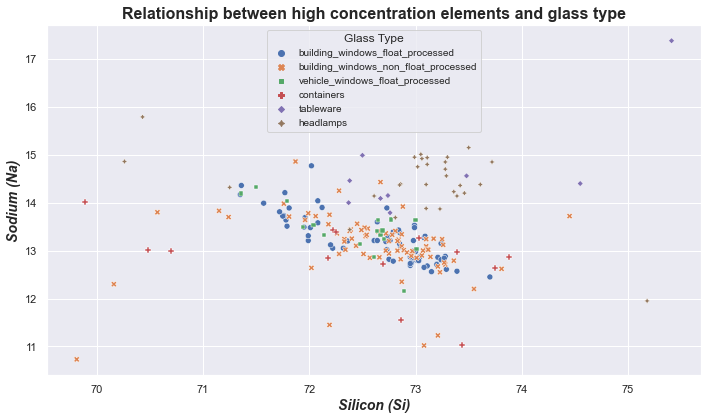

In [63]:
#Relationship between the high concentration Elements and glass type

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.scatterplot(data=glass_dataset, x="Silicon(Si)", y="Sodium(Na)", hue="Glass_Type", style="Glass_Type")
ax.set_title('Relationship between high concentration elements and glass type', fontsize=16, fontweight='bold')
ax.set_xlabel('Silicon (Si)', fontsize=14, fontweight='semibold', fontstyle='italic')
ax.set_ylabel('Sodium (Na)', fontsize=14, fontweight='semibold', fontstyle='italic')

plt.legend(title='Glass Type', fontsize=10)
plt.tight_layout()
plt.show()

**Insights**
* The above graph shows the relation between Silicon and Sodium for different glass type.
* The graph shows weak negative correlation and indicates for increase in Silicon content the Sodium content decreases for different glass types

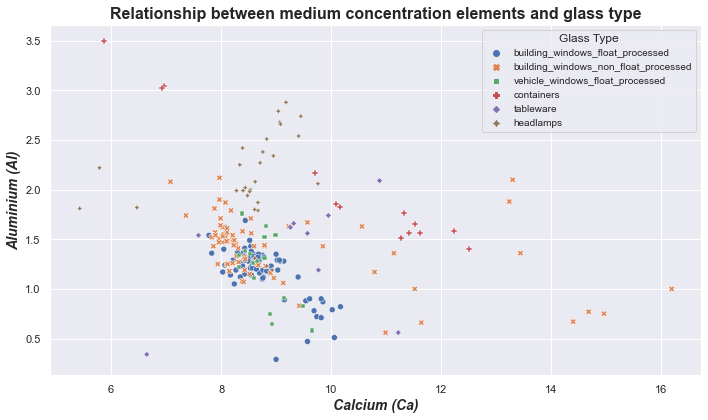

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.scatterplot(data=glass_dataset, x="Calcium(Ca)", y="Aluminium(Al)", hue="Glass_Type", style="Glass_Type")
ax.set_title('Relationship between medium concentration elements and glass type', fontsize=16, fontweight='bold')
ax.set_xlabel('Calcium (Ca)', fontsize=14, fontweight='semibold', fontstyle='italic')
ax.set_ylabel('Aluminium (Al)', fontsize=14, fontweight='semibold', fontstyle='italic')

plt.legend(title='Glass Type', fontsize=10)
plt.tight_layout()
plt.show()

In [65]:
#dropping Glass_Type column
glass_dataset.drop('Glass_Type', axis=1, inplace=True)
glass_dataset

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Task 3: Data Modelling

In [66]:
#Handling warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Importing packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [68]:
#Splitting input columns from the dataset
X = glass_dataset.iloc[:, :-1]
X

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe)
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [69]:
#Storing the target value
Y = glass_dataset.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type_of_glass, Length: 213, dtype: object

In [70]:
#Standardization
min_vals = X.min()
max_vals = X.max()
X_std = (X - min_vals) / (max_vals - min_vals)
X_std

,RefractiveIndex,Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe)
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


## Classification model using K-Nearest Neighbor algorithm

### Simple Train_Test_split

In [71]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2,random_state=4)

In [72]:
print("Size of Training Input data: ",X_train.shape)
print("Size of Training Output data: ",y_train.shape)
print("Size of Testing Input data: ", X_test.shape)
print("Size of Testing Output data: ", y_test.shape)

Size of Training Input data:  (170, 9)
Size of Training Output data:  (170,)
Size of Testing Input data:  (43, 9)
Size of Testing Output data:  (43,)


In [73]:
#code(method) to find best K, weights and p value for the classifier

def knn_parameter_tuning(n,p_value,weight_value):
    accuracy_list = []
    for k in range(1,n):
        clf = KNeighborsClassifier(n_neighbors=k, p=p_value, weights=weight_value)
        fit = clf.fit(X_train, y_train)
        y_pre = fit.predict(X_test)
        cm = confusion_matrix(y_test, y_pre)
        cr = classification_report(y_test, y_pre)
        accuracy = accuracy_score(y_test, y_pre)
        print(f"Accuracy value when K = {k} is {accuracy}")
        accuracy_list.append(accuracy)
    best_accuracy = max(accuracy_list)
    k_value = accuracy_list.index(best_accuracy)+1
    print(f"The Best k value is {k_value} with accuracy of {best_accuracy}")
    
    clf=KNeighborsClassifier(n_neighbors=k, p=p_value, weights=weight_value)
   
    fit = clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    print("Confusion matrix")
    cm = confusion_matrix(y_test,y_pre)
    print(cm)
    print("Classification Report")
    print(classification_report(y_test, y_pre))
    return (f"Tuned parameter are weights = {weight_value}, p = {p_value} and K = {k_value} with the accuracy of {best_accuracy}")



In [74]:
#List to store the results of parameter tuning
results = []

#finding the result with 15 samples, p=1 and uniform weight
results.append(knn_parameter_tuning(15,1,"uniform"))

Accuracy value when K = 1 is 0.8372093023255814
Accuracy value when K = 2 is 0.7906976744186046
Accuracy value when K = 3 is 0.7906976744186046
Accuracy value when K = 4 is 0.7674418604651163
Accuracy value when K = 5 is 0.8372093023255814
Accuracy value when K = 6 is 0.813953488372093
Accuracy value when K = 7 is 0.7906976744186046
Accuracy value when K = 8 is 0.7209302325581395
Accuracy value when K = 9 is 0.7441860465116279
Accuracy value when K = 10 is 0.7674418604651163
Accuracy value when K = 11 is 0.7441860465116279
Accuracy value when K = 12 is 0.7674418604651163
Accuracy value when K = 13 is 0.7674418604651163
Accuracy value when K = 14 is 0.7674418604651163
The Best k value is 1 with accuracy of 0.8372093023255814
Confusion matrix
[[13  0  0  0  0]
 [ 5 13  0  0  0]
 [ 0  2  1  0  1]
 [ 1  0  0  0  0]
 [ 0  1  0  0  6]]
Classification Report
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       0.81    

In [75]:
#finding the result with 15 samples, p=2 and uniform weight
results.append(knn_parameter_tuning(15,2,"uniform"))

Accuracy value when K = 1 is 0.813953488372093
Accuracy value when K = 2 is 0.7209302325581395
Accuracy value when K = 3 is 0.813953488372093
Accuracy value when K = 4 is 0.7674418604651163
Accuracy value when K = 5 is 0.7209302325581395
Accuracy value when K = 6 is 0.7906976744186046
Accuracy value when K = 7 is 0.7441860465116279
Accuracy value when K = 8 is 0.7209302325581395
Accuracy value when K = 9 is 0.7441860465116279
Accuracy value when K = 10 is 0.7674418604651163
Accuracy value when K = 11 is 0.7209302325581395
Accuracy value when K = 12 is 0.7674418604651163
Accuracy value when K = 13 is 0.6744186046511628
Accuracy value when K = 14 is 0.7674418604651163
The Best k value is 1 with accuracy of 0.813953488372093
Confusion matrix
[[13  0  0  0  0]
 [ 4 13  0  0  1]
 [ 0  2  1  0  1]
 [ 1  0  0  0  0]
 [ 0  1  0  0  6]]
Classification Report
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       0.81      

In [76]:
#finding the result with 15 samples, p=1 and distance weight
results.append(knn_parameter_tuning(15,1,"distance"))

Accuracy value when K = 1 is 0.8372093023255814
Accuracy value when K = 2 is 0.8372093023255814
Accuracy value when K = 3 is 0.7906976744186046
Accuracy value when K = 4 is 0.8372093023255814
Accuracy value when K = 5 is 0.8372093023255814
Accuracy value when K = 6 is 0.813953488372093
Accuracy value when K = 7 is 0.8604651162790697
Accuracy value when K = 8 is 0.813953488372093
Accuracy value when K = 9 is 0.7906976744186046
Accuracy value when K = 10 is 0.8372093023255814
Accuracy value when K = 11 is 0.813953488372093
Accuracy value when K = 12 is 0.7906976744186046
Accuracy value when K = 13 is 0.8372093023255814
Accuracy value when K = 14 is 0.813953488372093
The Best k value is 7 with accuracy of 0.8604651162790697
Confusion matrix
[[13  0  0  0  0]
 [ 4 14  0  0  0]
 [ 0  1  2  0  1]
 [ 1  0  0  0  0]
 [ 0  1  0  0  6]]
Classification Report
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       0.88      0

In [77]:
#finding the result with 15 samples, p=2 and distance weight
results.append(knn_parameter_tuning(15,2,"distance"))

Accuracy value when K = 1 is 0.813953488372093
Accuracy value when K = 2 is 0.813953488372093
Accuracy value when K = 3 is 0.813953488372093
Accuracy value when K = 4 is 0.813953488372093
Accuracy value when K = 5 is 0.813953488372093
Accuracy value when K = 6 is 0.7906976744186046
Accuracy value when K = 7 is 0.813953488372093
Accuracy value when K = 8 is 0.7906976744186046
Accuracy value when K = 9 is 0.7906976744186046
Accuracy value when K = 10 is 0.813953488372093
Accuracy value when K = 11 is 0.7906976744186046
Accuracy value when K = 12 is 0.7906976744186046
Accuracy value when K = 13 is 0.7674418604651163
Accuracy value when K = 14 is 0.7674418604651163
The Best k value is 1 with accuracy of 0.813953488372093
Confusion matrix
[[12  1  0  0  0]
 [ 4 13  0  0  1]
 [ 0  1  2  0  1]
 [ 1  0  0  0  0]
 [ 0  1  0  0  6]]
Classification Report
              precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           2       0.81      0.72 

In [78]:
#Printing the results
for i in range(0,len(results)):
    print(results[i], end="\n")

Tuned parameter are weights = uniform, p = 1 and K = 1 with the accuracy of 0.8372093023255814
Tuned parameter are weights = uniform, p = 2 and K = 1 with the accuracy of 0.813953488372093
Tuned parameter are weights = distance, p = 1 and K = 7 with the accuracy of 0.8604651162790697
Tuned parameter are weights = distance, p = 2 and K = 1 with the accuracy of 0.813953488372093


**Insights**

From the above results it is evident that, weights = distance, p = 1 and K = 7 provides the best accuracy of 86%. 

### With Feature selection using Hill Climbing algorithm

In [79]:
#Feature selection
from sklearn.utils import shuffle

col_num = X_std.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=4)
column_names = X_std.columns.to_list()

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X_std.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, Y, test_size=0.2, random_state=4)
    clf = KNeighborsClassifier(7, weights='distance', p=1)  #parameters used are from previous results
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(new_Ind)
        selected_columns = [column_names[i] for i in new_Ind]
        
print("List of selected subset of features")  
columns_chosen = []
for index, name in enumerate(selected_columns):
    columns_chosen.append(name)        
    print(f"Column {index}: {name}")

#Storing selected features        
X_optimised_knn = X_std[columns_chosen].copy()      


Score with 1 selected features: 0.4883720930232558
[3]
Score with 2 selected features: 0.6511627906976745
[3, 4]
Score with 3 selected features: 0.8372093023255814
[3, 4, 6]
Score with 4 selected features: 0.8372093023255814
[3, 4, 6, 0]
Score with 5 selected features: 0.8372093023255814
[3, 4, 6, 0, 5]
Score with 6 selected features: 0.8604651162790697
[3, 4, 6, 0, 5, 7]
List of selected subset of features
Column 0: Aluminium(Al)
Column 1: Silicon(Si)
Column 2: Calcium(Ca)
Column 3: RefractiveIndex
Column 4: Potassium(K)
Column 5: Barium(Ba)


In [80]:
X_optimised_knn

,Aluminium(Al),Silicon(Si),Calcium(Ca),RefractiveIndex,Potassium(K),Barium(Ba)
0,0.252336,0.351786,0.308550,0.432836,0.009662,0.000000
1,0.333333,0.521429,0.223048,0.283582,0.077295,0.000000
2,0.389408,0.567857,0.218401,0.220808,0.062802,0.000000
3,0.311526,0.500000,0.259294,0.285777,0.091787,0.000000
4,0.295950,0.583929,0.245353,0.275241,0.088567,0.000000
...,...,...,...,...,...,...
209,0.806854,0.500000,0.348513,0.223003,0.012882,0.336508
210,0.529595,0.580357,0.276022,0.250219,0.000000,0.504762
211,0.538941,0.644643,0.279740,0.417032,0.000000,0.520635
212,0.514019,0.678571,0.283457,0.235294,0.000000,0.498413


### Using K-Fold Cross validation 

In [81]:
#Importing packages
from sklearn.model_selection import KFold, cross_val_score

In [82]:
#code(method) to find the best k value for k-fold cross validation
def k_fold_cross_validation(n,weight_value,p_value):
    best_score = 0
    best_k = None

    knn = KNeighborsClassifier(n_neighbors= n, weights = weight_value,p = p_value)
    for k in range(3,15):
        scores = cross_val_score(knn, X_optimised_knn, Y, cv=k, scoring='accuracy')  #using the X with selected features
        average_score = scores.mean()
        print(f"Average scores when K = {k} is {average_score}")
        if average_score > best_score:
            best_score = average_score
            best_k = k

    print("Best k value:", best_k)
    print("Best score:", best_score)

In [83]:
#testing using the tuned parameters from previous steps of knn classifier which produced 81% accuracy
k_fold_cross_validation(7,'distance',1)

Average scores when K = 3 is 0.7183098591549295
Average scores when K = 4 is 0.7182040531097135
Average scores when K = 5 is 0.7186046511627907
Average scores when K = 6 is 0.7465608465608465
Average scores when K = 7 is 0.7365591397849461
Average scores when K = 8 is 0.7370014245014245
Average scores when K = 9 is 0.750805152979066
Average scores when K = 10 is 0.7417748917748919
Average scores when K = 11 is 0.7177033492822967
Average scores when K = 12 is 0.741013071895425
Average scores when K = 13 is 0.7460407239819005
Average scores when K = 14 is 0.7607142857142856
Best k value: 14
Best score: 0.7607142857142856


In [84]:
#KNN classification using selected features and tuned parameters of k-fold
Mymodel = KNeighborsClassifier(n_neighbors= 7, weights = "distance",p = 1)

kf = KFold(n_splits=13, random_state=0, shuffle=True)

for fold, (train_index, test_index) in enumerate(kf.split(X_optimised_knn, Y)):
    X_train, X_test = X_optimised_knn.iloc[train_index], X_optimised_knn.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Model training
    clf = Mymodel.fit(X_train, y_train)
    #Predicting the test set
    y_pre=clf.predict(X_test)
    # Evaluating the model
    accuracy = Mymodel.score(X_test, y_test)
    print(f"Fold = {fold}, Accuracy = {accuracy}")

Fold = 0, Accuracy = 0.7647058823529411
Fold = 1, Accuracy = 0.7647058823529411
Fold = 2, Accuracy = 0.8235294117647058
Fold = 3, Accuracy = 0.6470588235294118
Fold = 4, Accuracy = 0.7058823529411765
Fold = 5, Accuracy = 0.6875
Fold = 6, Accuracy = 0.8125
Fold = 7, Accuracy = 0.875
Fold = 8, Accuracy = 0.75
Fold = 9, Accuracy = 0.75
Fold = 10, Accuracy = 0.75
Fold = 11, Accuracy = 0.8125
Fold = 12, Accuracy = 0.8125


Accuracy of KNN Classifier is: 0.7209302325581395
Error rate of KNN Classifier is: 0.2790697674418605
Confusion matrix
[[ 7  2  0  0  0  0]
 [ 1 16  1  0  0  0]
 [ 2  2  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.70      0.89      0.78        18
           3       0.67      0.33      0.44         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.67      0.56      0.58        43
weighted avg       0.70      0.72      0.69        43



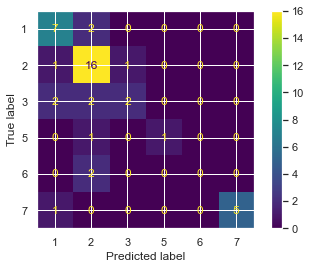

In [85]:
#Glass Classification using KNN classifier with the selected features
from sklearn.metrics import ConfusionMatrixDisplay

X_train_set, X_test_set, Y_train_set, Y_test_set=train_test_split(X_optimised_knn,Y,test_size=0.20,random_state=0)
knn_classifier = KNeighborsClassifier(n_neighbors= 5, weights = "distance",p = 1)

scores = cross_val_score(knn_classifier, X_std, Y, cv= 9, scoring='accuracy')
knn_classifier.fit(X_train_set,Y_train_set)
knn_predicted=knn_classifier.predict(X_test_set)
KNN_classifier_accuracy = accuracy_score(Y_test_set, knn_predicted)
print("Accuracy of KNN Classifier is:", KNN_classifier_accuracy)
KNN_error_rate = 1 - KNN_classifier_accuracy
print("Error rate of KNN Classifier is:", KNN_error_rate)
print("Confusion matrix")
cm_knn = confusion_matrix(Y_test_set,knn_predicted)
print(cm_knn)

# confusion matrix
disp_m = ConfusionMatrixDisplay(cm_knn, display_labels=knn_classifier.classes_)

print(classification_report(Y_test_set, knn_predicted))
disp_m.plot()

## Classification using Decision tree algorithm

In [86]:
#Importing packages
from sklearn.tree import DecisionTreeClassifier


### Using simple train test split

In [87]:
#Splittimg the dataset
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=4)

In [88]:
print("Size of Training Input data: ",X_train.shape)
print("Size of Training Output data: ",y_train.shape)
print("Size of Testing Input data: ", X_test.shape)
print("Size of Testing Output data: ", y_test.shape)

Size of Training Input data:  (170, 9)
Size of Training Output data:  (170,)
Size of Testing Input data:  (43, 9)
Size of Testing Output data:  (43,)


In [89]:
#Finding the best parameters
best_score = 0.0
best_params = {}

criterions = ['gini', 'entropy']
max_depth_range = [None, 5, 10, 15]
max_features_range = ['auto', 'sqrt', 'log2']
min_samples_split_range = [2, 3, 4, 5]  
min_samples_leaf_range = [1, 2, 3, 4, 5]

for criterion in criterions:
    for max_depth in max_depth_range:
        for max_features in max_features_range:
            for min_samples_split in min_samples_split_range:
                for min_samples_leaf in min_samples_leaf_range:
                    clf = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, max_features=max_features,
                                                 min_samples_split=min_samples_split,
                                                 min_samples_leaf=min_samples_leaf)
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    score = accuracy_score(y_test, y_pred)
                    if score > best_score:
                        best_score = score
                        best_params = {'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features,
                                       'min_samples_split': min_samples_split,
                                       'min_samples_leaf': min_samples_leaf}
                    
print("Best Hyperparameters:")
for key, value in best_params.items():
    print(f"{key} : {value}")
print("Best Score:", best_score)

Best Hyperparameters:
criterion : entropy
max_depth : 10
max_features : auto
min_samples_split : 3
min_samples_leaf : 1
Best Score: 0.8837209302325582


### with Feature selection using Hill climbing algorithm

In [90]:
#Feature selection using the best parameters from previous results
from sklearn.utils import shuffle

col_num = X_std.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
column_names = X_std.columns.to_list()

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X_std.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, Y, test_size=0.2, random_state=0)
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, max_features='auto',min_samples_split=3,
                                                 min_samples_leaf=1)  #using the best hyperparameters
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(new_Ind)
        selected_columns = [column_names[i] for i in new_Ind]
        
print("List of selected subset of features")  
columns_chosen = []
for index, name in enumerate(selected_columns):
    columns_chosen.append(name)        
    print(f"Column {index}: {name}")

#Storing selected features        
X_optimised_dt = X_std[columns_chosen].copy()      


Score with 1 selected features: 0.20930232558139536
[8]
Score with 2 selected features: 0.4883720930232558
[8, 2]
Score with 3 selected features: 0.5813953488372093
[8, 2, 6]
Score with 4 selected features: 0.6046511627906976
[8, 2, 6, 7]
Score with 5 selected features: 0.7209302325581395
[8, 2, 6, 7, 1]
List of selected subset of features
Column 0: Iron(Fe)
Column 1: Magnesium(Mg)
Column 2: Calcium(Ca)
Column 3: Barium(Ba)
Column 4: Sodium(Na)


In [91]:
X_optimised_dt

,Iron(Fe),Magnesium(Mg),Calcium(Ca),Barium(Ba),Sodium(Na)
0,0.0,1.000000,0.308550,0.000000,0.437594
1,0.0,0.801782,0.223048,0.000000,0.475188
2,0.0,0.790646,0.218401,0.000000,0.421053
3,0.0,0.821826,0.259294,0.000000,0.372932
4,0.0,0.806236,0.245353,0.000000,0.381955
...,...,...,...,...,...
209,0.0,0.000000,0.348513,0.336508,0.512782
210,0.0,0.000000,0.276022,0.504762,0.630075
211,0.0,0.000000,0.279740,0.520635,0.545865
212,0.0,0.000000,0.283457,0.498413,0.548872


### Using K-Fold Cross validation 

In [92]:
#Importing packages
from sklearn.model_selection import KFold, cross_val_score

In [93]:
def k_fold_cross_validation(criterion, max_depth, max_features, min_samples_split, min_samples_leaf):

    best_score = 0
    best_k = None

    clf = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, max_features=max_features,
                                                 min_samples_split=min_samples_split,
                                                 min_samples_leaf=min_samples_leaf)

    for k in range(3,15):
        scores = cross_val_score(clf, X_optimised_dt, Y, cv=k, scoring='accuracy')
        average_score = scores.mean()
        print(f"Average scores when K = {k} is {average_score}")
        if average_score > best_score:
            best_score = average_score
            best_k = k

    print("Best k value:", best_k)
    print("Best score:", best_score)

In [94]:
k_fold_cross_validation('entropy',10,'auto',3,1)

Average scores when K = 3 is 0.4647887323943662
Average scores when K = 4 is 0.5445492662473794
Average scores when K = 5 is 0.5120708748615725
Average scores when K = 6 is 0.5916666666666667
Average scores when K = 7 is 0.5403993855606759
Average scores when K = 8 is 0.5544871794871795
Average scores when K = 9 is 0.5634057971014492
Average scores when K = 10 is 0.5824675324675324
Average scores when K = 11 is 0.49712918660287075
Average scores when K = 12 is 0.5441176470588235
Average scores when K = 13 is 0.6207579185520362
Average scores when K = 14 is 0.588095238095238
Best k value: 13
Best score: 0.6207579185520362


In [96]:
#Decision tree algorithm using the selected parameters of k-fold
Mymodel = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, max_features='auto', min_samples_split=3,
                                                 min_samples_leaf=1)


kf = KFold(n_splits=13, random_state=0, shuffle=True)

for fold, (train_index, test_index) in enumerate(kf.split(X_optimised_dt, Y)):
    X_train, X_test = X_optimised_dt.iloc[train_index], X_optimised_dt.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    #Model training
    clf = Mymodel.fit(X_train, y_train)
    #Predicting the test set
    y_pre=clf.predict(X_test)
    # Evaluating the model
    accuracy = Mymodel.score(X_test, y_test)
    print(f"Fold = {fold}, Accuracy = {accuracy}")

Fold = 0, Accuracy = 0.6470588235294118
Fold = 1, Accuracy = 0.6470588235294118
Fold = 2, Accuracy = 0.7058823529411765
Fold = 3, Accuracy = 0.7647058823529411
Fold = 4, Accuracy = 0.6470588235294118
Fold = 5, Accuracy = 0.625
Fold = 6, Accuracy = 0.6875
Fold = 7, Accuracy = 0.375
Fold = 8, Accuracy = 0.625
Fold = 9, Accuracy = 0.75
Fold = 10, Accuracy = 0.8125
Fold = 11, Accuracy = 0.75
Fold = 12, Accuracy = 0.625


Accuracy of Decision Tree Classifier is: 0.6744186046511628
Error rate of Decision Tree Classifier is: 0.32558139534883723
Confusion matrix
[[ 5  3  1  0  0  0]
 [ 2 14  0  0  1  1]
 [ 2  1  2  0  0  1]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.56      0.56      0.56         9
           2       0.70      0.78      0.74        18
           3       0.67      0.33      0.44         6
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         6

    accuracy                           0.67        43
   macro avg       0.56      0.61      0.57        43
weighted avg       0.64      0.67      0.64        43



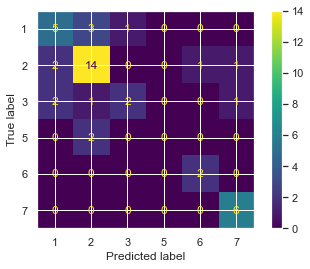

In [97]:
#Glass Classification using Decision tree algorithm with the selected features

X_train_set, X_test_set, Y_train_set, Y_test_set=train_test_split(X_optimised_dt,Y,test_size=0.20,random_state=0)
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, max_features='auto', min_samples_split=3,
                                                 min_samples_leaf=1)
scores = cross_val_score(dt_classifier, X_std, Y, cv= 13, scoring='accuracy')
dt_classifier.fit(X_train_set,Y_train_set)
dt_predicted=dt_classifier.predict(X_test_set)
Decision_tree_classifier_accuracy = accuracy_score(Y_test_set, dt_predicted)
print("Accuracy of Decision Tree Classifier is:", Decision_tree_classifier_accuracy)
Decision_Tree_error_rate = 1 - Decision_tree_classifier_accuracy
print("Error rate of Decision Tree Classifier is:", Decision_Tree_error_rate)
print("Confusion matrix")
cm_dt = confusion_matrix(Y_test_set,dt_predicted)
print(cm_dt)

# confusion matrix
disp = ConfusionMatrixDisplay(cm_dt, display_labels=dt_classifier.classes_)

print(classification_report(Y_test_set, dt_predicted))
disp.plot()

## Model comparison

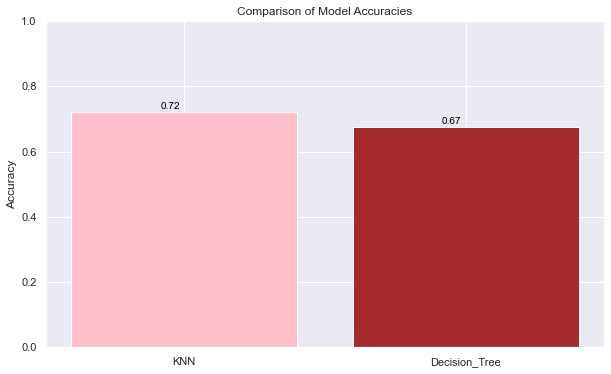

In [98]:
#Accuracy comparison
models = ['KNN', 'Decision_Tree']

# Accuracy values
accuracies = [KNN_classifier_accuracy, Decision_tree_classifier_accuracy]

#bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['pink', 'brown'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, 
             bar.get_height() + 0.01, 
             f'{accuracy:.2f}', 
             ha='center', 
             color='black', 
             fontsize=10)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

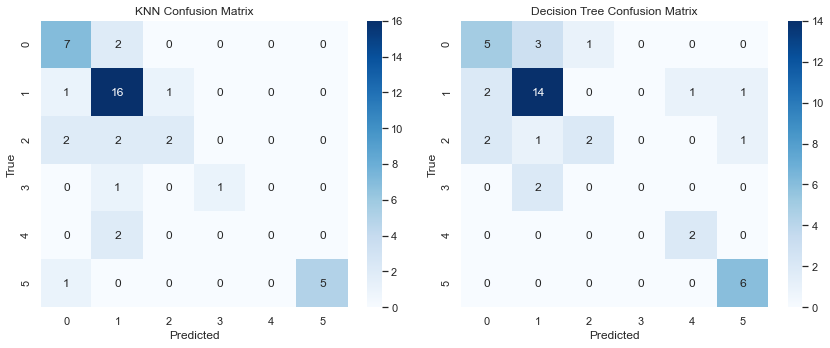

In [99]:
#Confusion matrix comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

References:
1. https://archive.ics.uci.edu/dataset/42/glass+identification
2. https://en.wikipedia.org/wiki/Refractive_index
3. https://refractiveindex.info/?shelf=3d&book=glass&page=BK7#:~:text=Refractive%20index%5B%20i%20%5D,n%20%3D%201.5168
4. https://www.physlink.com/reference/indicesofrefraction.cfm
5. https://corporatefinanceinstitute.com/resources/data-science/skewness/#:~:text=Skewness%20is%20a%20measure%20of,is%20symmetrical%20on%20both%20sides
6. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
7. Practical Data Science with Python course materials